# Carregar e Limpar dados ausentes e duplicados

[Dataset utilizado](https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k/data?select=GoodReads_100k_books.csv)

Carregando

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Tentar carregar o dataset, ignorando as linhas problemáticas
df = pd.read_csv('/content/GoodReads_100k_books.csv', engine='python', on_bad_lines='skip')

# Verificar se todas as linhas foram carregadas corretamente
print(f"Número de linhas carregadas: {df.shape[0]}")

# Exibir as primeiras linhas do DataFrame
df.head()


Número de linhas carregadas: 45211


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [3]:
# Substituir strings vazias por NaN, para reconhecer como valor ausente
df = df.replace('', np.nan)

Limpando duplicatas

In [4]:
# Contar duplicatas
print("Duplicatas antes:", df.duplicated().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Verificar o resultado
print("Duplicatas depois:", df.duplicated().sum())


Duplicatas antes: 0
Duplicatas depois: 0


Limpando valores ausentes

In [5]:
# Verificar quantos valores ausentes há em cada coluna
missing_values = df.isnull().sum()
print(missing_values)


author             0
bookformat      1466
desc            2995
genre           4229
img             1338
isbn            5629
isbn13          4329
link               0
pages              0
rating             0
reviews            0
title              0
totalratings       0
dtype: int64


In [6]:
# Remover as linhas com valores ausentes em 'title', 'rating', 'reviews' e 'totalratings'
df = df.dropna(subset=['title', 'rating', 'reviews', 'totalratings'])

# Preencher valores ausentes com valores padrão
df['bookformat'] = df['bookformat'].fillna('Desconhecido')
df['desc'] = df['desc'].fillna('Descrição não fornecida')
df['genre'] = df['genre'].fillna('Gênero desconhecido')
df['img'] = df['img'].fillna('Imagem não fornecida')
df['isbn'] = df['isbn'].fillna('ISBN não fornecido')
df['isbn13'] = df['isbn13'].fillna('ISBN13 não fornecido')
df['link'] = df['link'].fillna('Link não fornecido')
df['pages'] = df['pages'].fillna('Páginas desconhecidas')

# Verificar se ainda há valores ausentes
print(df.isnull().sum())

# Remover duplicatas
df = df.drop_duplicates()

# Verificar o número de linhas após as mudanças
print(f"Número de linhas após tratamento de valores ausentes: {df.shape[0]}")


author          0
bookformat      0
desc            0
genre           0
img             0
isbn            0
isbn13          0
link            0
pages           0
rating          0
reviews         0
title           0
totalratings    0
dtype: int64
Número de linhas após tratamento de valores ausentes: 45211


In [7]:
# Exibir informações do DataFrame para confirmar a limpeza
print(df.info())
# Exibir as primeiras linhas do DataFrame para uma revisão visual
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        45211 non-null  object 
 1   bookformat    45211 non-null  object 
 2   desc          45211 non-null  object 
 3   genre         45211 non-null  object 
 4   img           45211 non-null  object 
 5   isbn          45211 non-null  object 
 6   isbn13        45211 non-null  object 
 7   link          45211 non-null  object 
 8   pages         45211 non-null  int64  
 9   rating        45211 non-null  float64
 10  reviews       45211 non-null  int64  
 11  title         45211 non-null  object 
 12  totalratings  45211 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 4.5+ MB
None


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,Desconhecido,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",Gênero desconhecido,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,ISBN13 não fornecido,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


# Análise exploratória dos dados

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribuição dos Ratings

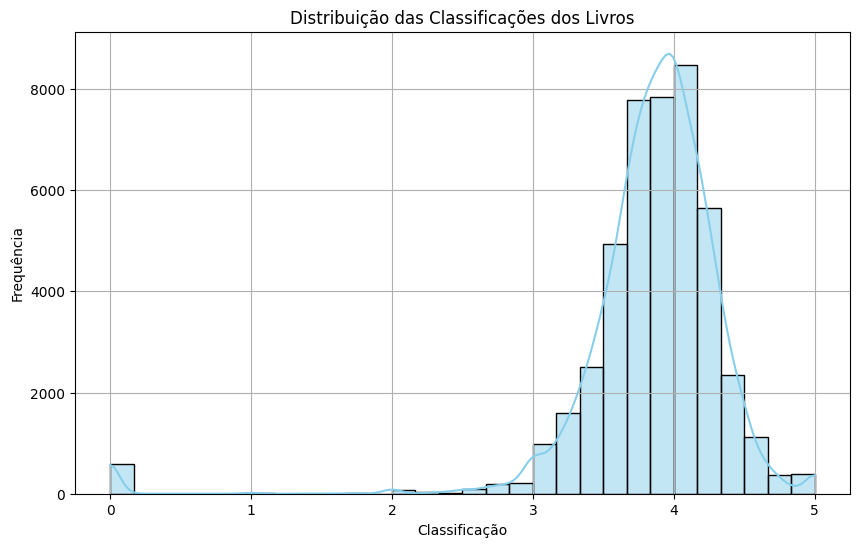

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribuição das Classificações dos Livros')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Gêneros mais comuns

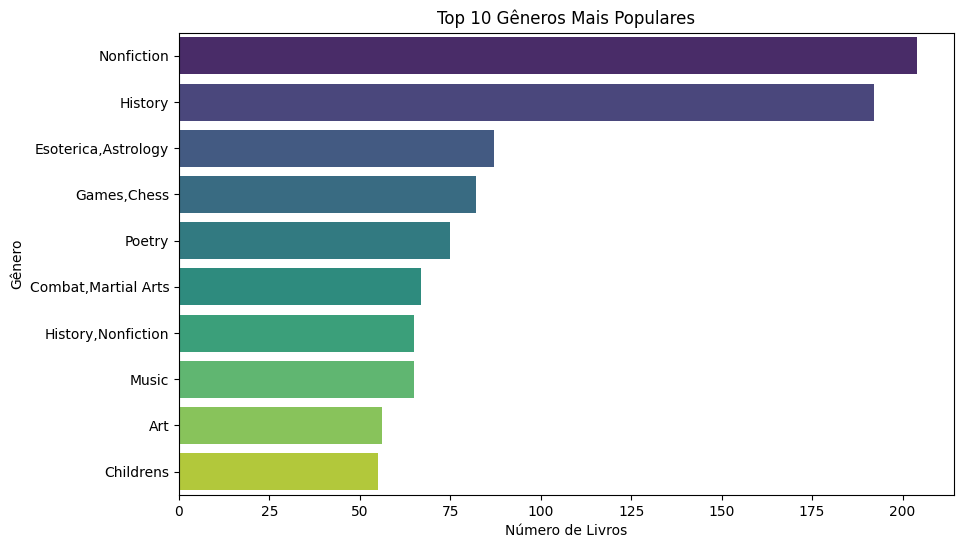

In [10]:
# Remover o "Gênero desconhecido" antes de plotar
genre_counts = df[df['genre'] != 'Gênero desconhecido']['genre'].value_counts().head(10)

# Visualizando os 10 gêneros mais populares com o ajuste de 'hue' e 'legend'
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis', hue=genre_counts.index, dodge=False)
plt.title('Top 10 Gêneros Mais Populares')
plt.xlabel('Número de Livros')
plt.ylabel('Gênero')
plt.legend([],[], frameon=False)  # Remover a legenda
plt.show()


Autores mais populares

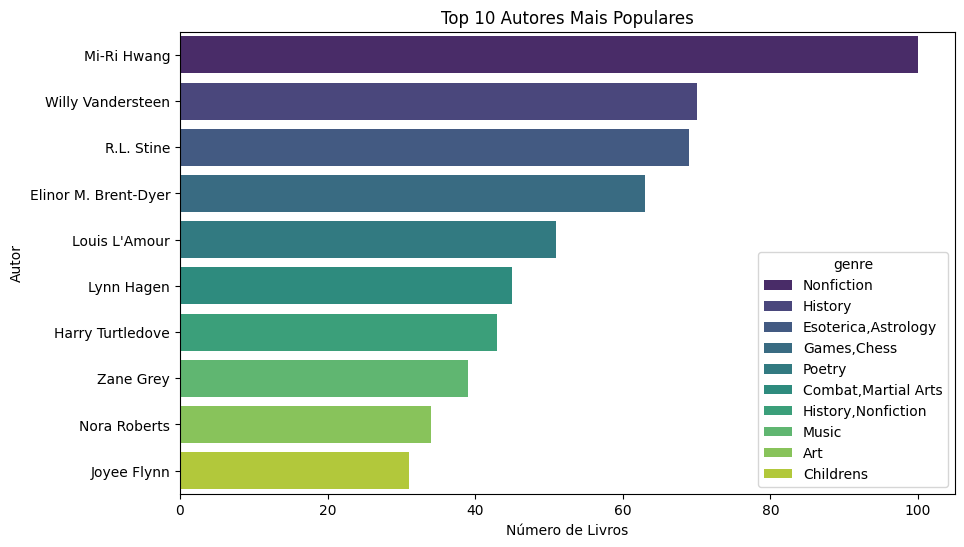

In [11]:
author_counts = df['author'].value_counts().head(10)

# Visualizando os 10 autores mais populares
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis', hue=genre_counts.index, dodge=False)
plt.title('Top 10 Autores Mais Populares')
plt.xlabel('Número de Livros')
plt.ylabel('Autor')
plt.show()


Livros com maior e menor média de avaliação

In [12]:
# Top 10 livros mais bem avaliados
top_rated_books = df[['title', 'rating']].sort_values(by='rating', ascending=False).head(10)

# 10 livros de pior avaliação
bottom_rated_books = df[['title', 'rating']].sort_values(by='rating', ascending=True).head(10)

print("Top 10 Livros Mais Bem Avaliados:")
print(top_rated_books)

print("\n10 Livros de pior Avaliação:")
print(bottom_rated_books)


Top 10 Livros Mais Bem Avaliados:
                                                   title  rating
43806  The Abels -Tasmania's Mountains Over 1100m Vol...     5.0
489    Early Anglo Saxon Art And Archaeology: Being T...     5.0
1477   Isis on the Nile. Egyptian Gods in Hellenistic...     5.0
20780                                  To BEE or not be?     5.0
32021                                   Wines of Lebanon     5.0
20781  Brauns Brauerei Atlas: Band 1: Mittelfranken u...     5.0
20782  Brauns Brauerei Atlas: Band 2: Unterfranken un...     5.0
33856  The Face of the Earth: Natural Landscapes, Sci...     5.0
19723                           British Mesozoic Fossils     5.0
42901       SÃ¤mtliche Klaviersonaten, Band Ii, (Urtext)     5.0

10 Livros de pior Avaliação:
                                                   title  rating
38356            Labor Embattled: History, Power, Rights     0.0
6975   Study Guide and Working Papers to Accompany Ad...     0.0
20085  Modern Cults: Peopl

Livros com mais de 3 avaliações

In [13]:
# Filtrando os livros com mais de 3 avaliações
filtered_books = df[df['reviews'] > 3]

# Top 10 livros mais bem avaliados
top_rated_books = filtered_books[['title', 'rating', 'reviews']].sort_values(by='rating', ascending=False).head(10)

# Bottom 10 livros menos bem avaliados
bottom_rated_books = filtered_books[['title', 'rating', 'reviews']].sort_values(by='rating').head(10)

# Exibindo as tabelas dos livros mais e menos bem avaliados
print("Top 10 Livros Mais Bem Avaliados:")
print(top_rated_books.to_string(index=False))

print("\ 10 Livros de pior Avaliação:")
print(bottom_rated_books.to_string(index=False))


Top 10 Livros Mais Bem Avaliados:
                                                                                                                                                                                          title  rating  reviews
                                                                                                                                                                           Living Enlightenment    4.95       74
                                                                                                                                                               Commentary on Genesis - Volume 1    4.93        5
                                                                                                                                                    Rejoice In My Gladness: The Life of Tahirih    4.85        4
A Psalter for Prayer: An Adaptation of the Classic Miles Coverdale Translation, Augmented by Prayers and Instructional Material Dr

Estatísticas descritivas

In [14]:
# Estatísticas descritivas para as colunas numéricas
desc_stats = df[['rating', 'pages', 'reviews', 'totalratings']].describe()

# Exibindo as estatísticas
print(desc_stats)


             rating         pages        reviews  totalratings
count  45211.000000  45211.000000   45211.000000  4.521100e+04
mean       3.839172    259.452832     178.648581  3.129072e+03
std        0.582122    468.413522    1499.208405  3.772687e+04
min        0.000000      0.000000       0.000000  0.000000e+00
25%        3.670000    142.000000       3.000000  3.400000e+01
50%        3.910000    240.000000      15.000000  1.550000e+02
75%        4.130000    336.000000      67.000000  7.910000e+02
max        5.000000  70000.000000  158776.000000  3.819326e+06


# Preparação dos dados

Filtragem features mais importantes para modelagem

In [15]:
# Selecionando apenas as colunas de interesse
df_model = df[['genre', 'reviews', 'totalratings', 'rating', 'pages']]


Dividindo livros com mais de um gênero, linkando 1 livro a mais de uma string 'gênero' (rodar esse bloco uma vez na sessão)

In [16]:
# Atribuir a coluna 'genre' explicitamente usando `.loc`
df_model.loc[:, 'genre'] = df_model['genre'].str.split(',')

# Contar os gêneros após a divisão
genre_counts = df_model.explode('genre')['genre'].value_counts().drop('Gênero desconhecido').head(10)


<Figure size 640x480 with 0 Axes>

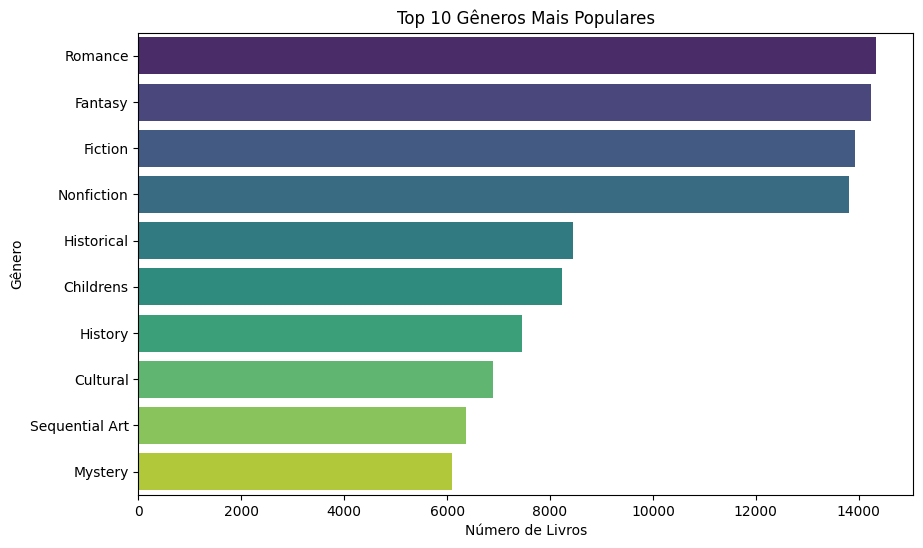

In [17]:
plt.clf()  # Limpa a figura antes de gerar um novo gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis', hue=genre_counts.index)
plt.title('Top 10 Gêneros Mais Populares')
plt.xlabel('Número de Livros')
plt.ylabel('Gênero')
plt.show()


# Modelos preditivos

## Escolha de valores "base"

### Definindo avaliação boa como nota média 4 ou maior

In [18]:
df_model['boa_avaliacao'] = (df_model['rating'] >= 4.0).astype(int)

<ipython-input-18-fa5691bed339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['boa_avaliacao'] = (df_model['rating'] >= 4.0).astype(int)


### Criando variáveis para 'genre' não ser uma lista

In [19]:
# Manter a coluna 'genre' com valores separados por vírgula e aplicar One-Hot Encoding
genre_dummies = df_model['genre'].str.get_dummies(sep=', ')

# Juntar com as outras features numéricas (reviews, totalratings, pages)
df_features = pd.concat([df_model[['reviews', 'totalratings', 'pages']], genre_dummies], axis=1)

# Agora, defina as features (X) e o alvo (y)
X = df_features
y = df_model['boa_avaliacao']

### Treino/teste definidos como 80/20

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Escalonamento das variáveis numéricas

In [21]:
from sklearn.preprocessing import StandardScaler

# Padronização dos dados de treino e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Regressão logística

In [22]:
from sklearn.linear_model import LogisticRegression

# Instanciar o modelo de regressão logística
modelo = LogisticRegression(random_state=42)

# Treinar o modelo
modelo.fit(X_train_scaled, y_train)

# Obter previsões para os dados de treino e teste
y_train_pred = modelo.predict(X_train_scaled)
y_test_pred = modelo.predict(X_test_scaled)


# Avaliação do modelo

### Visualização da modelagem

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def getMetrics(y_true, y_pred):
    '''Retorna: accuracy, f1-score, recall, precision'''
    acc = accuracy_score(y_true, y_pred)
    fone = f1_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred, pos_label=1)
    prec1 = precision_score(y_true, y_pred, pos_label=1)
    return acc, fone, rec, prec1

def checkMetrics(train: tuple, test: tuple, size: int = 5):
    '''Visualiza métricas de treino e teste e exibe matriz de confusão e curva ROC'''
    print(f'''
            \tTreinamento\t|  Teste
Acurácia:\t{accuracy_score(train[0], train[1]):.11f}\t|  {accuracy_score(test[0], test[1]):.11f}
Precisão[1]:\t{precision_score(train[0], train[1], pos_label=1):.11f}\t|  {precision_score(test[0], test[1], pos_label=1):.11f}
Recall:  \t{recall_score(train[0], train[1], pos_label=1):.11f}\t|  {recall_score(test[0], test[1], pos_label=1):.11f}
F1-Score:\t{f1_score(train[0], train[1], pos_label=1):.11f}\t|  {f1_score(test[0], test[1], pos_label=1):.11f}
Precisão[0]:\t{precision_score(train[0], train[1], pos_label=0):.11f}\t|  {precision_score(test[0], test[1], pos_label=0):.11f}
TNR:     \t{recall_score(train[0], train[1], pos_label=0):.11f}\t|  {recall_score(test[0], test[1], pos_label=0):.11f}
''')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(size * 2.4, size))

    # Matriz de Confusão
    ax1.set_title("Matriz de Confusão [Teste]")
    ConfusionMatrixDisplay.from_predictions(test[0], test[1], ax=ax1, display_labels=['Não boa', 'Boa'])

    # Curva ROC
    ax2.set_title("Curva ROC [Teste]")
    RocCurveDisplay.from_predictions(test[0], test[1], pos_label=1, ax=ax2)

    plt.show()



### Resultado modelo de reg. logística


            	Treinamento	|  Teste
Acurácia:	0.71101526211	|  0.67289616278
Precisão[1]:	0.68257549462	|  0.62669919833
Recall:  	0.53656207367	|  0.48792401628
F1-Score:	0.60082493126	|  0.54867256637
Precisão[0]:	0.72431423470	|  0.69436345967
TNR:     	0.82992374930	|  0.80011198208



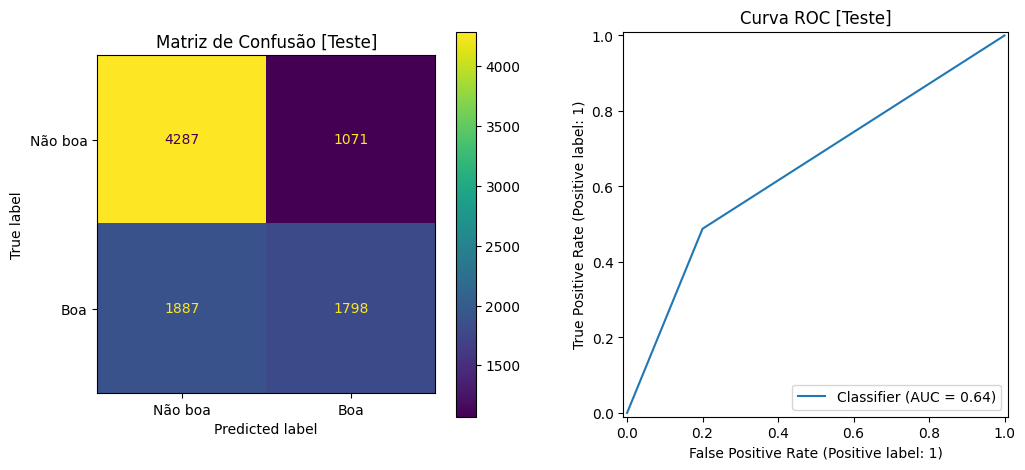

In [24]:
# Exibir métricas e gráficos
checkMetrics((y_train, y_train_pred), (y_test, y_test_pred))

# Random Forest


            	Treinamento	|  Teste
Acurácia:	0.90964388410	|  0.70120535221
Precisão[1]:	0.86368279913	|  0.62849673203
Recall:  	0.92271487040	|  0.65237449118
F1-Score:	0.89222346811	|  0.64021304927
Precisão[0]:	0.94474787867	|  0.75450364124
TNR:     	0.90073461038	|  0.73478910041



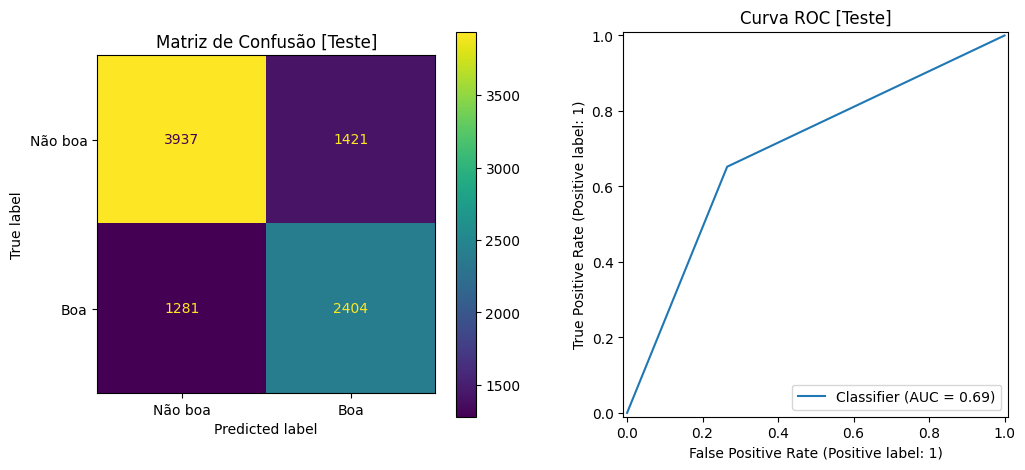

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar e treinar o modelo
modelo = RandomForestClassifier(n_estimators = 300, max_depth = 50, class_weight='balanced', random_state=42)
modelo.fit(X_train_scaled, y_train)

# Avaliar o modelo usando a função `checkMetrics`
y_train_pred = modelo.predict(X_train_scaled)
y_test_pred = modelo.predict(X_test_scaled)

checkMetrics((y_train, y_train_pred), (y_test, y_test_pred), size=5)
